In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image
import tensorflow.keras.layers as k
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img

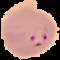

In [3]:
load_img("Malarial Cell Image Data/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png",target_size=(60,60))

In [4]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [5]:
np.random.seed(312)

In [6]:
image_dir = "Malarial Cell Image Data/cell_images/"
size = 64
dataset = []
label = []

In [7]:
parasitized_img = os.listdir(image_dir+"Parasitized/")
for i, img_name in enumerate(parasitized_img):
    if(img_name.split('.')[1]=='png'):
        image = cv2.imread(image_dir+"Parasitized/"+img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size,size))

        dataset.append(np.array(image))
        label.append(0)

In [8]:
uninfected_img = os.listdir(image_dir+"Uninfected/")

for i, img_name in enumerate(uninfected_img):
    if(img_name.split('.')[1]=='png'):
        image = cv2.imread(image_dir+"Uninfected/"+img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size,size))

        dataset.append(np.array(image))
        label.append(1)

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train,X_test,Y_train,Y_test = train_test_split(dataset,to_categorical(np.array(label)),test_size=0.3,random_state=0)

In [10]:
INP_SIZE = (size,size,3)

inp = k.Input(shape=INP_SIZE)

conv1 = k.Conv2D(32,kernel_size = (3,3), activation = "relu", padding = "same")(inp)

pool1 = k.MaxPool2D(pool_size=(2,2))(conv1)

norm1 = k.BatchNormalization(axis = -1)(pool1)

dropout1 = k.Dropout(rate=0.2)(norm1)


conv2 = k.Conv2D(32,kernel_size = (3,3), activation = "relu", padding = "same")(dropout1)

pool2 = k.MaxPool2D(pool_size=(2,2))(conv2)

norm2 = k.BatchNormalization(axis = -1)(pool2)

dropout2 = k.Dropout(rate=0.2)(norm2)


flat = k.Flatten()(dropout2)

hidden1 = k.Dense(512,activation="relu")(flat)

norm3 = k.BatchNormalization(axis=-1)(hidden1)

dropout3 = k.Dropout(rate=0.2)(norm3)


hidden2 = k.Dense(256,activation="relu")(dropout3)

norm4 = k.BatchNormalization(axis=-1)(hidden2)

dropout4 = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2,activation="sigmoid")(dropout4)

In [11]:
model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [12]:
history = model.fit(np.array(X_train),Y_train,batch_size = 64,verbose = 1,epochs = 5,validation_split=0.1,shuffle=False)

Epoch 1/5
177/177 [==============================] - 32s 171ms/step - loss: 0.6137 - accuracy: 0.7234 - val_loss: 2.7879 - val_accuracy: 0.2627
Epoch 2/5
177/177 [==============================] - 32s 179ms/step - loss: 0.3503 - accuracy: 0.8487 - val_loss: 1.0634 - val_accuracy: 0.6210
Epoch 3/5
177/177 [==============================] - 31s 173ms/step - loss: 0.2483 - accuracy: 0.8977 - val_loss: 0.2641 - val_accuracy: 0.9053
Epoch 4/5
177/177 [==============================] - 32s 178ms/step - loss: 0.2041 - accuracy: 0.9194 - val_loss: 0.2546 - val_accuracy: 0.9092
Epoch 5/5
177/177 [==============================] - 32s 181ms/step - loss: 0.1805 - accuracy: 0.9308 - val_loss: 0.2390 - val_accuracy: 0.9084


In [13]:
model.evaluate(np.array(X_test),np.array(Y_test))

169/169 [==============================] - 3s 20ms/step - loss: 0.2395 - accuracy: 0.9022


[0.23953907191753387, 0.9022305011749268]